
# 1. Import Libraries

<br>

In [1]:
# Data Manipulation
import pandas as pd

# Numerical Analysis
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Operating System
import os

# Deep Learning and Object Detection
import tensorflow as tf
from tensorflow import keras
import cv2

# Data Extraction
import glob
from xml.etree import ElementTree

# 2. Reading DataFrame from Local Storage
<br>

In [2]:
annotations_info_df = pd.read_csv('Processed Data/annotations_info.csv')
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-1.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-2.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-3.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4067.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4068.png
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4069.png
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4070.png


# 3. Train Test Split



<br>

In [3]:
# Data Splitting
test_df = annotations_info_df[:800]
train_df = annotations_info_df[800:]

# Check The Shape of Splitted Data (Train and Test)
train_df.shape, test_df.shape

((3272, 11), (800, 11))

In [4]:
# Glimpse of Train Data
train_df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
800,226,86,238,98,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-800.png
801,155,83,172,103,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-801.png
802,32,57,49,89,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-802.png
803,385,77,400,93,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-803.png
804,17,42,55,85,without_mask,maksssksksss254,400,217,maksssksksss254.xml,maksssksksss254.png,maksssksksss254-804.png


In [5]:
# Number of Categories / Labels
classes = list(train_df['label'].unique())

# 4. Exploratory Data Analysis (EDA)

<br>

In [6]:
train_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
800,226,86,238,98,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-800.png
801,155,83,172,103,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-801.png
802,32,57,49,89,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-802.png
803,385,77,400,93,without_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-803.png
804,17,42,55,85,without_mask,maksssksksss254,400,217,maksssksksss254.xml,maksssksksss254.png,maksssksksss254-804.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4067.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4068.png
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4069.png
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4070.png


In [7]:
# Count Occurence of Labels
train_df['label'].value_counts()

with_mask                2651
without_mask              521
mask_incorrectly_worn     100
Name: label, dtype: int64

In [8]:
sorted_label_df = pd.DataFrame(train_df['label'].value_counts()).reset_index()
sorted_label_df.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sorted_label_df

,label,count
0,with_mask,2651
1,without_mask,521
2,mask_incorrectly_worn,100


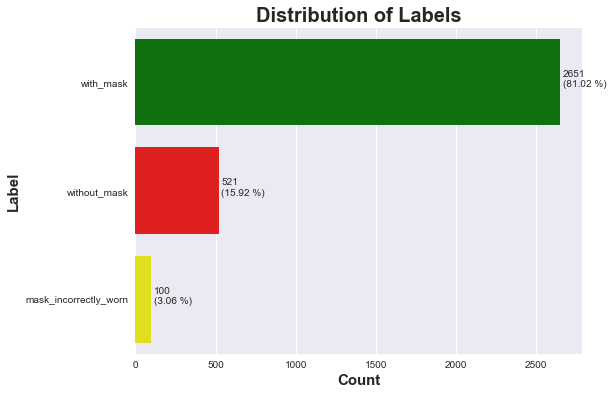

In [9]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 6))
barplot = sns.barplot(x = 'count', y = 'label', data = sorted_label_df, orient = 'horizontal', 
                      palette = ['green', 'red', 'yellow'])
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    percentage = round(width * 100 / sum(sorted_label_df['count']), 2)
    plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} %)')

plt.show()

In [10]:
cropped_image_directory = './Processed Data/cropped_images/'

cropped_image_path = cropped_image_directory + train_df['cropped_image_file'].iloc[0]
cropped_image = cv2.imread(cropped_image_path)

cropped_image.shape

(12, 12, 3)

In [11]:
image_width = []
image_height = []

for i in range(len(train_df)):
    cropped_image_path = cropped_image_directory + train_df['cropped_image_file'].iloc[i]
    cropped_image = cv2.imread(cropped_image_path)
    image_width.append(cropped_image.shape[0])
    image_height.append(cropped_image.shape[1])

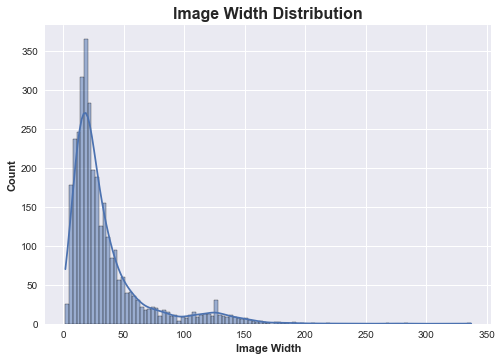

In [12]:
sns.histplot(image_width, kde = True)
plt.title('Image Width Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Width', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show()

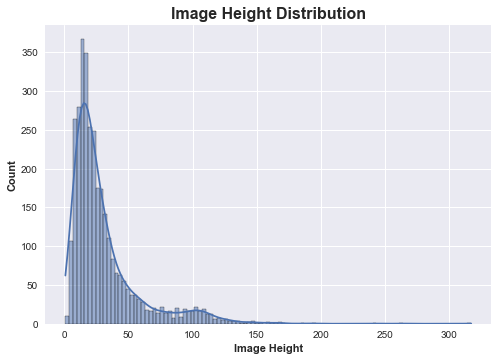

In [13]:
sns.histplot(image_height, kde = True)
plt.title('Image Height Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Height', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show()

In [14]:
print('IMAGE WIDTH')
print(f'Min: {min(image_width)}')
print(f'Max: {max(image_width)}')
print(f'Mean: {np.mean(image_width)}')
print(f'Median: {np.median(image_width)}')
print('IMAGE HEIGHT')
print(f'Min: {min(image_height)}')
print(f'Max: {max(image_height)}')
print(f'Mean: {np.mean(image_height)}')
print(f'Median: {np.median(image_height)}')

IMAGE WIDTH
Min: 2
Max: 337
Mean: 34.65739608801956
Median: 23.0
IMAGE HEIGHT
Min: 1
Max: 317
Mean: 30.802261613691932
Median: 22.0


In [15]:
image_target_size = (int(np.median(image_width)), int(np.median(image_height)))
image_target_size

(23, 22)

# 5. Image Data Generator

In [16]:
from keras_preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale = 1. / 255., validation_split = 0.25)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = cropped_image_directory,
    x_col = 'cropped_image_file',
    y_col = 'label',
    subset = 'training',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

valid_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = cropped_image_directory,
    x_col = 'cropped_image_file',
    y_col = 'label',
    subset = 'validation',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 2454 validated image filenames belonging to 3 classes.
Found 818 validated image filenames belonging to 3 classes.


In [17]:
test_image_generator = ImageDataGenerator(rescale = 1. / 255.)

test_generator = train_image_generator.flow_from_dataframe(
    dataframe = test_df,
    directory = cropped_image_directory,
    x_col = 'cropped_image_file',
    y_col = 'label',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 800 validated image filenames belonging to 3 classes.


In [18]:
print(train_generator)
print(valid_generator)
print(test_generator)

# 6. Modelling

In [19]:
input_shape = [int(np.median(image_width)), int(np.median(image_height)), 3]
input_shape

[23, 22, 3]

In [20]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', 
                        input_shape = input_shape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [21]:
model.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])

> Start Training the Model

In [22]:
history = model.fit(train_generator, 
                    epochs = 100, 
                    steps_per_epoch = len(train_generator), 
                    validation_data = valid_generator, 
                    validation_steps = len(valid_generator)
                   )

Epoch 1/100
77/77 [==============================] - 3s 35ms/step - loss: 0.6915 - accuracy: 0.7657 - recall: 0.5949 - val_loss: 0.5273 - val_accuracy: 0.8081 - val_recall: 0.7995
Epoch 2/100
77/77 [==============================] - 2s 32ms/step - loss: 0.5097 - accuracy: 0.8109 - recall: 0.8036 - val_loss: 0.4984 - val_accuracy: 0.8081 - val_recall: 0.8068
Epoch 3/100
77/77 [==============================] - 2s 31ms/step - loss: 0.4324 - accuracy: 0.8117 - recall: 0.8081 - val_loss: 0.3779 - val_accuracy: 0.8166 - val_recall: 0.7983
Epoch 4/100
77/77 [==============================] - 2s 31ms/step - loss: 0.3019 - accuracy: 0.9079 - recall: 0.8676 - val_loss: 0.2764 - val_accuracy: 0.9156 - val_recall: 0.9059
Epoch 5/100
77/77 [==============================] - 2s 29ms/step - loss: 0.2456 - accuracy: 0.9214 - recall: 0.9128 - val_loss: 0.2642 - val_accuracy: 0.9181 - val_recall: 0.9132
Epoch 6/100
77/77 [==============================] - 2s 31ms/step - loss: 0.2163 - accuracy: 0.9299 

77/77 [==============================] - 2s 30ms/step - loss: 0.0850 - accuracy: 0.9707 - recall: 0.9690 - val_loss: 0.1713 - val_accuracy: 0.9377 - val_recall: 0.9352
Epoch 47/100
77/77 [==============================] - 2s 31ms/step - loss: 0.0815 - accuracy: 0.9711 - recall: 0.9690 - val_loss: 0.1780 - val_accuracy: 0.9401 - val_recall: 0.9364
Epoch 48/100
77/77 [==============================] - 2s 30ms/step - loss: 0.0819 - accuracy: 0.9715 - recall: 0.9707 - val_loss: 0.1870 - val_accuracy: 0.9413 - val_recall: 0.9377
Epoch 49/100
77/77 [==============================] - 2s 30ms/step - loss: 0.0845 - accuracy: 0.9715 - recall: 0.9686 - val_loss: 0.1851 - val_accuracy: 0.9389 - val_recall: 0.9352
Epoch 50/100
77/77 [==============================] - 2s 30ms/step - loss: 0.0836 - accuracy: 0.9682 - recall: 0.9666 - val_loss: 0.1801 - val_accuracy: 0.9389 - val_recall: 0.9389
Epoch 51/100
77/77 [==============================] - 2s 30ms/step - loss: 0.0763 - accuracy: 0.9768 - recal

77/77 [==============================] - 2s 31ms/step - loss: 0.0326 - accuracy: 0.9886 - recall: 0.9882 - val_loss: 0.3709 - val_accuracy: 0.9377 - val_recall: 0.9377
Epoch 92/100
77/77 [==============================] - 2s 31ms/step - loss: 0.0239 - accuracy: 0.9935 - recall: 0.9931 - val_loss: 0.2579 - val_accuracy: 0.9438 - val_recall: 0.9438
Epoch 93/100
77/77 [==============================] - 3s 33ms/step - loss: 0.0233 - accuracy: 0.9919 - recall: 0.9919 - val_loss: 0.3221 - val_accuracy: 0.9425 - val_recall: 0.9413
Epoch 94/100
77/77 [==============================] - 3s 36ms/step - loss: 0.0214 - accuracy: 0.9951 - recall: 0.9947 - val_loss: 0.3083 - val_accuracy: 0.9438 - val_recall: 0.9413
Epoch 95/100
77/77 [==============================] - 2s 32ms/step - loss: 0.0242 - accuracy: 0.9914 - recall: 0.9914 - val_loss: 0.3146 - val_accuracy: 0.9425 - val_recall: 0.9413
Epoch 96/100
77/77 [==============================] - 2s 32ms/step - loss: 0.0254 - accuracy: 0.9910 - recal

In [23]:
result = pd.DataFrame(history.history)
result

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.691451,0.765689,0.594947,0.527272,0.808068,0.799511
1,0.509736,0.810921,0.803586,0.498390,0.808068,0.806846
2,0.432400,0.811736,0.808068,0.377940,0.816626,0.798289
3,0.301938,0.907905,0.867563,0.276376,0.915648,0.905868
4,0.245590,0.921353,0.912795,0.264163,0.918093,0.913203
...,...,...,...,...,...,...
95,0.025404,0.991035,0.990220,0.299451,0.948655,0.947433
96,0.020277,0.994703,0.994703,0.288883,0.948655,0.948655
97,0.022101,0.993073,0.992665,0.340917,0.940098,0.940098
98,0.021161,0.994295,0.993480,0.348214,0.941320,0.940098


<AxesSubplot:>

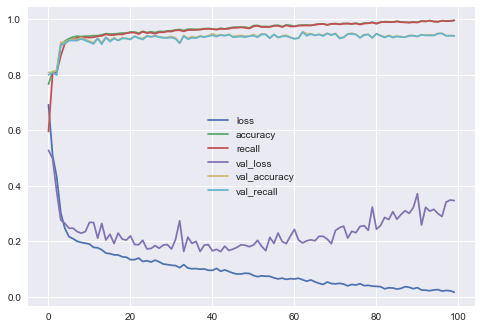

In [24]:
result.plot()

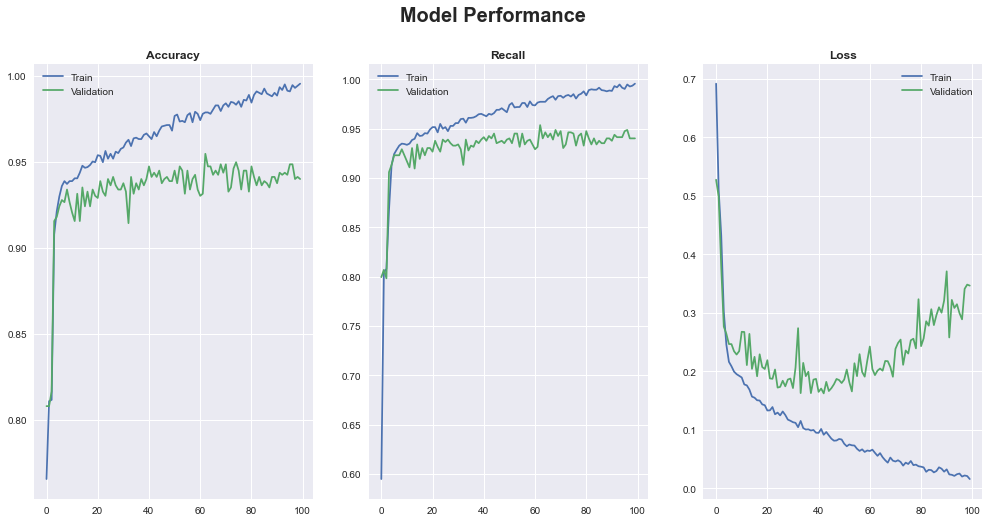

In [25]:
def plot_line(result, ax, col, title, train_column, valid_column):
    # Line Plot of Model Performance
    ax[col].plot(result[train_column])
    ax[col].plot(result[valid_column])
    
    # Title and Legend
    ax[col].set_title(title, fontweight = 'bold')
    ax[col].legend(['Train', 'Validation'])
    
# Create a 1x3 Grid and Set Main Title
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 8))
fig.suptitle('Model Performance', fontsize = 20, fontweight = 'bold')

# Visualization of Accuracy, Recall, and Loss
plot_line(result, ax, 0, 'Accuracy', 'accuracy', 'val_accuracy')
plot_line(result, ax, 1, 'Recall', 'recall', 'val_recall')
plot_line(result, ax, 2, 'Loss', 'loss', 'val_loss')
plt.show()

In [26]:
model.evaluate(test_generator)

25/25 [==============================] - 4s 164ms/step - loss: 0.4546 - accuracy: 0.9200 - recall: 0.9200


[0.4546446204185486, 0.9200000166893005, 0.9200000166893005]

# 7. Saving the Trained Model Locally
<br>

In [27]:
model.save('_Trainned-CNN-Model/cnn-Face-Mask.h5')